<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Download-das-bibliotecas" data-toc-modified-id="Download-das-bibliotecas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Download das bibliotecas</a></span></li><li><span><a href="#Construção-do-Modelo" data-toc-modified-id="Construção-do-Modelo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Construção do Modelo</a></span></li><li><span><a href="#Otimização-dos-Parâmetros" data-toc-modified-id="Otimização-dos-Parâmetros-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Otimização dos Parâmetros</a></span></li><li><span><a href="#Quantificação-de-Incertezas" data-toc-modified-id="Quantificação-de-Incertezas-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Quantificação de Incertezas</a></span></li><li><span><a href="#7-parameters" data-toc-modified-id="7-parameters-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>7 parameters</a></span></li><li><span><a href="#23-parameters" data-toc-modified-id="23-parameters-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>23 parameters</a></span></li></ul></div>

## Download das bibliotecas

In [1]:
using Pkg
Pkg.activate("..")
Pkg.status()

Activating environment at `~/Documents/modelo-covid19/Project.toml`
    Status `~/Documents/modelo-covid19/Project.toml`
  [864edb3b] DataStructures v0.17.15
  [aae7a2af] DiffEqFlux v1.9.0
  [1130ab10] DiffEqParamEstim v1.14.0
  [41bf760c] DiffEqSensitivity v6.13.0
  [ef61062a] DiffEqUncertainty v1.4.1
  [0c46a032] DifferentialEquations v6.13.0
  [31c24e10] Distributions v0.21.12
  [587475ba] Flux v0.10.4
  [1b10255b] GlobalSensitivityAnalysis v0.0.10
  [429524aa] Optim v0.20.6
  [1dea7af3] OrdinaryDiffEq v5.35.5
  [65888b18] ParameterizedFunctions v5.3.0
  [91a5bcdd] Plots v1.2.4
  [438e738f] PyCall v1.91.4
  [d330b81b] PyPlot v2.9.0
  [8a4e6c94] QuasiMonteCarlo v0.2.0
  [e88e6eb3] Zygote v0.4.19


In [2]:
include("../src/dados.jl");

In [3]:
include("../src/models.jl");

In [4]:
include("../src/graphs.jl");

In [5]:
include("../src/parametrization.jl");

In [6]:
include("../src/optimization.jl");

## Construção do Modelo

In [7]:
ts = 0.0:1.0:float(n_pts)
sol = model(params_rio_base, CI_Rio, ts);

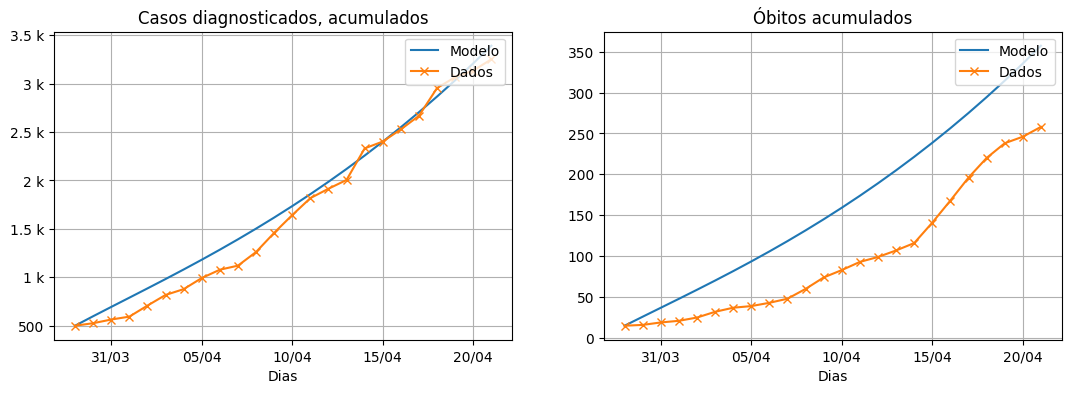

In [8]:
fig, axs = PyPlot.subplots(ncols=2, figsize=(13,4))
datas = [Rio_acc_d,Rio_acc_m]
series = [sol[9,:],sol[10,:]]
axs[1].set_title("Casos diagnosticados, acumulados")
axs[2].set_title("Óbitos acumulados")
for (ax,serie,data) in zip(axs,series,datas)
    graph_py.plot_accum(serie, data,real_data = true, ax = ax,blur = 1.0, cor_serie = "C0", cor_dados = "C1x-")
end

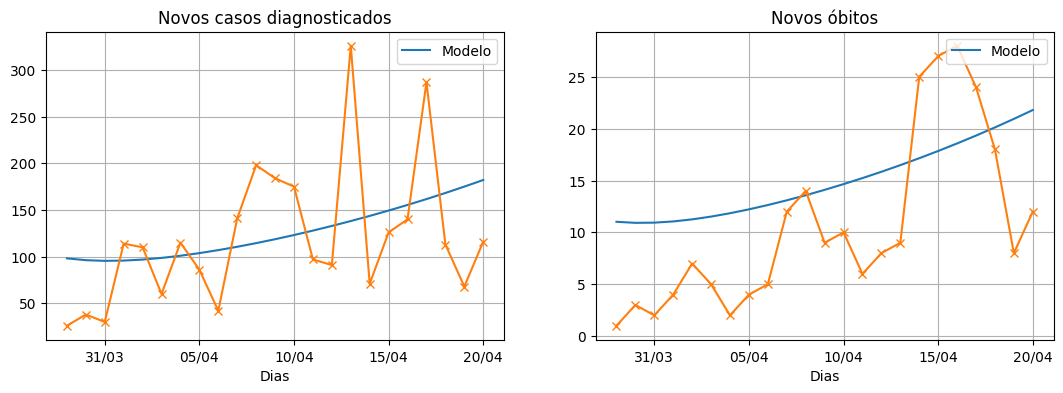

In [9]:
fig, axs = PyPlot.subplots(ncols=2, figsize=(13,4))
datas = [diagn_Rio,obitos_Rio]
series = [sol[9,:],sol[10,:]]
axs[1].set_title("Novos casos diagnosticados")
axs[2].set_title("Novos óbitos")
for (ax,serie,data) in zip(axs,series,datas)
    graph_py.plot_daily(serie, data,real_data = true, ax = ax, cor_serie = "C0", cor_dados = "C1x-")
end

## Otimização dos Parâmetros

In [10]:
pp_p_ci(p_start)

População em quarentena = 4.0313418e6 = 60.0 %
          Exposta       = 3486.0
          Assintom      = 160.25940011462774
          Sintomática   = 1175.2356008406034
    
Taxa de contágio    = 2.1268425120951884
Fator cont assintom = 0.1
Em quarentena       = 60.0 % 
Prop sintomática    = 0.88
Taxa testagem A     = 0.01 ~ 100.0 dias
Taxa testagem I     = 0.03333333333333333 ~ 30.0 dias


In [11]:
loss_obj(p_start)

339838.65687845246

In [12]:
res = DiffEqFlux.sciml_train(loss_adjoint, p_start, Fminbox(LBFGS()),
    lower_bounds=[0.0, 0.01, 0.4, 0.80, 0, 0.2, 2], upper_bounds=[1e-6, 0.2, 0.7, 0.90, 0.4, 0.6, 50])
    #cb = cb)

 * Status: success

 * Candidate solution
    Minimizer: [8.98e-08, 2.00e-01, 6.30e-01,  ...]
    Minimum:   3.306136e+05

 * Found with
    Algorithm:     Fminbox with L-BFGS
    Initial Point: [1.00e-07, 1.00e-01, 6.00e-01,  ...]

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 6.19e+03 ≰ 1.0e-08

 * Work counters
    Seconds run:   29  (vs limit Inf)
    Iterations:    6
    f(x) calls:    3408
    ∇f(x) calls:   3408


In [13]:
pp_p_ci(p_start)

População em quarentena = 4.0313418e6 = 60.0 %
          Exposta       = 3486.0
          Assintom      = 160.25940011462774
          Sintomática   = 1175.2356008406034
    
Taxa de contágio    = 2.1268425120951884
Fator cont assintom = 0.1
Em quarentena       = 60.0 % 
Prop sintomática    = 0.88
Taxa testagem A     = 0.01 ~ 100.0 dias
Taxa testagem I     = 0.03333333333333333 ~ 30.0 dias


In [14]:
pp_p_ci(res.minimizer)

População em quarentena = 4.229943300503046e6 = 62.95586199864839 %
          Exposta       = 4011.169313013568
          Assintom      = 140.22292279681847
          Sintomática   = 1262.00630510633
    
Taxa de contágio    = 1.8770063728554425
Fator cont assintom = 0.19999999999948279
Em quarentena       = 62.95586199864839 % 
Prop sintomática    = 0.899999999995362
Taxa testagem A     = 0.01795460341181788 ~ 55.696022744885084 dias
Taxa testagem I     = 0.02992434936052564 ~ 33.41760209894951 dias


In [15]:
Ts = 0.0:1.0:23
CI_opt, p_opt = build_p_ci(res.minimizer)
sol = model(p_opt, CI_opt, Ts);

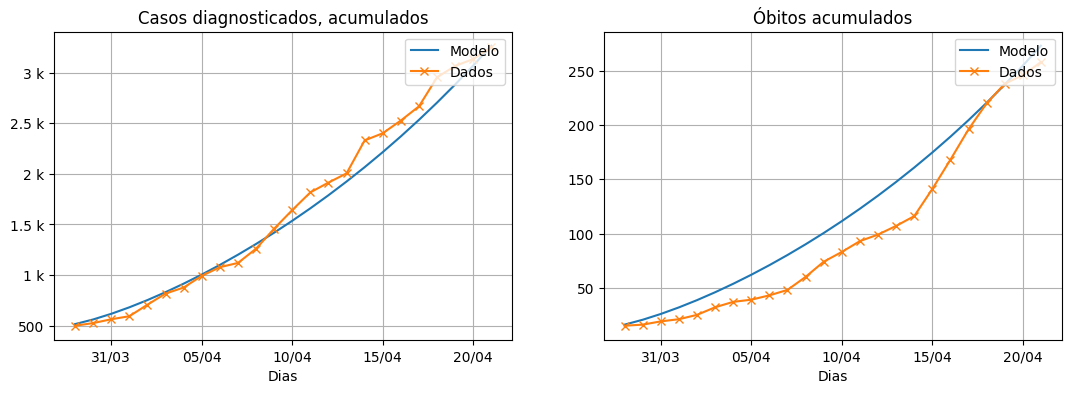

In [16]:
fig, axs = PyPlot.subplots(ncols=2, figsize=(13,4))
datas = [Rio_acc_d,Rio_acc_m]
series = [sol[9,1:24],sol[10,1:24]]
axs[1].set_title("Casos diagnosticados, acumulados")
axs[2].set_title("Óbitos acumulados")
for (ax,serie,data) in zip(axs,series,datas)
    graph_py.plot_accum(serie, data,real_data = true, ax = ax,blur = 1.0, cor_serie = "C0", cor_dados = "C1x-")
end

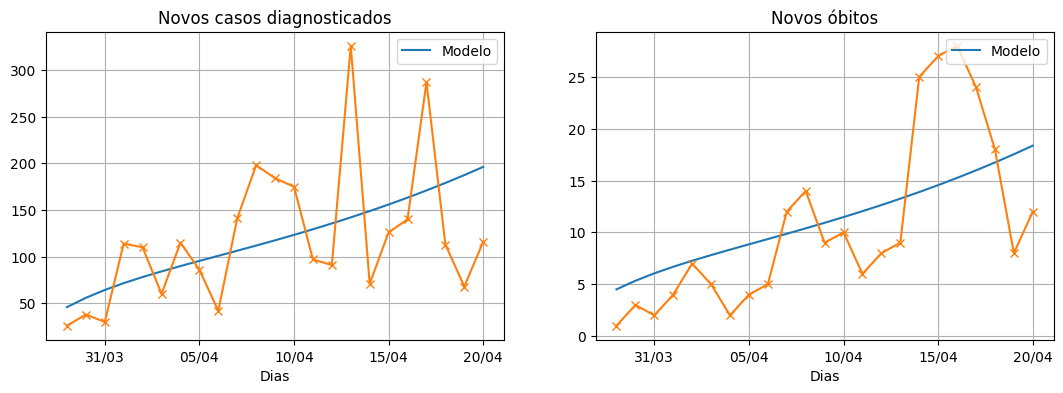

In [17]:
fig, axs = PyPlot.subplots(ncols=2, figsize=(13,4))
datas = [diagn_Rio,obitos_Rio]
series = [sol[9,1:24],sol[10,1:24]]
axs[1].set_title("Novos casos diagnosticados")
axs[2].set_title("Novos óbitos")
for (ax,serie,data) in zip(axs,series,datas)
    graph_py.plot_daily(serie, data,real_data = true, ax = ax, cor_serie = "C0", cor_dados = "C1x-")
end

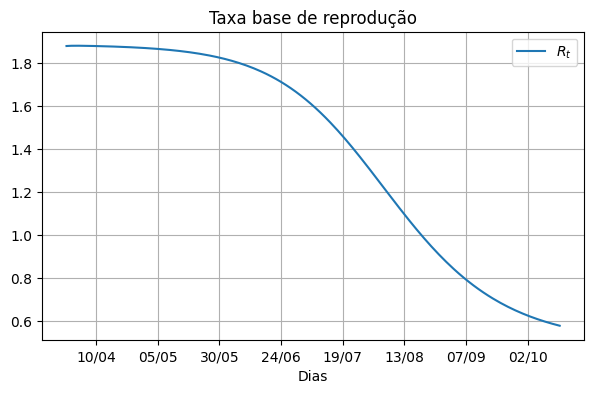

In [18]:
Ts = 0.0:1.0:200
CI_opt, p_opt = build_p_ci(res.minimizer)
sol = model(p_opt, CI_opt, Ts);
fig, ax = PyPlot.subplots(ncols=1, figsize=(7,4))
serie = Rt(sol,p_opt)
ax.set_title("Taxa base de reprodução")
graph_py.plot_accum(serie, Rio_acc_d,real_data = false, label = L"R_t", ax = ax,blur = 1.0, eng_fmt = false)

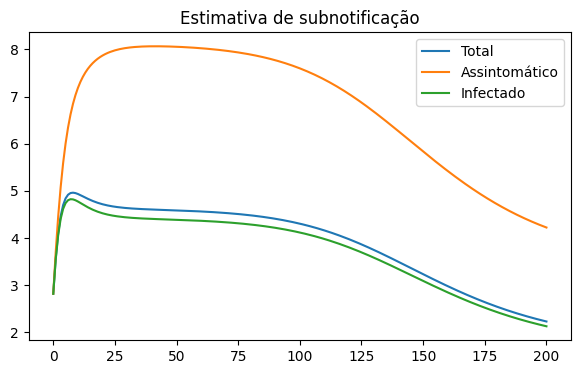

In [19]:
fig, ax = PyPlot.subplots(ncols=1, figsize=(7,4))
series_subnot = [(sol[4,:].+sol[5,:])./(sol[6,:].+sol[7,:]),(sol[4,:])./(sol[6,:]),(sol[5,:])./(sol[7,:])]
m_labels = ["Total", "Assintomático", "Infectado"]
ax.set_title("Estimativa de subnotificação")
for (serie,label) in zip(series_subnot,m_labels)
    ax.plot(serie, label = label)
end
ax.legend();

## Quantificação de Incertezas

In [132]:
N = 2000
lower_bounds=[0.0, 0.01, 0.4, 0.80, 0, 0.2, 2]
upper_bounds=[1e-6, 0.2, 0.7, 0.90, 0.4, 0.6, 50]
sampler = SobolSample()
A,B = QuasiMonteCarlo.generate_design_matrices(N,lower_bounds,upper_bounds,sampler);

In [133]:
function loss_obj_gsa(p_ci)
    # Initial condition and Parameters
    full_ci, p = build_p_ci(p_ci)
    
    prob = ODEProblem(g, full_ci, (0.0,200.0), p)
    # build_loss_objective(prob, Tsit5(), loss, maxiters=10000, verbose=false)
    sol = Array(concrete_solve(prob,TanYam7(),abstol=1e-14,reltol=1e-14, full_ci, p, saveat=0.0:1.0:200.0))
    if size(sol)[2] < 200
        return 1e7
    else
        arr_d = sol[9,:][2:200] .- sol[9,:][1:199]
        arr_o = sol[10,:][2:200] .- sol[10,:][1:199]
        max_o = maximum(arr_o)
        max_d = maximum(arr_d)
        Rts = Rt(sol,p)
        first = findfirst(x-> x < 1, Rts)
        if first == nothing
            first = 1e7
        end
        return [loss(sol), findfirst(x-> x == max_d, arr_d), sol[9,:][end],findfirst(x-> x == max_o, arr_o), sol[10,:][end], first]
    end
end

loss_obj_gsa (generic function with 1 method)

## 7 parameters

In [134]:
sobol_result = gsa(loss_obj_gsa,Sobol(),A,B);

In [135]:
using Printf

In [136]:
function print_analysis_7(sobol_result)
    labels = ["Taxa de contágio", "Fator cont assintom", "Quarentena", "Prop sintomática", "Taxa testagem I",
        "Taxa testagem A", "Subnotificação"]
    for i = 1:length(labels)
        v = sobol_result.ST[:,i]
        @printf  "%20s = % .5e % .5e % .5e % .5e % .5e % .5e\n" labels[i] v[1] v[2] v[3] v[4] v[5] v[6] 
    end
end

print_analysis_7 (generic function with 2 methods)

In [137]:
@printf "%31s %15s %11s %14s %11s %11s \n" "Loss" "Peak diag" "Max diag" "Peak deaths" "Max deaths" "Rt < 1"
print_analysis_7(sobol_result)

                           Loss       Peak diag    Max diag    Peak deaths  Max deaths      Rt < 1 
    Taxa de contágio =  7.79316e-01  9.94672e-01  7.47110e-01  9.89190e-01  7.79414e-01  9.79477e-01
 Fator cont assintom =  1.32014e-03  4.51942e-02 -2.24014e-04  3.77509e-02  1.48527e-05  1.04942e-01
          Quarentena =  4.06078e-01  3.46910e-01  4.77149e-02  3.20217e-01  4.41606e-02  6.64640e-01
    Prop sintomática =  1.24049e-02  8.48439e-02  2.33518e-03  7.34439e-02  9.60808e-03  2.44866e-01
     Taxa testagem I =  1.21462e-01  5.79481e-01  3.86872e-01  5.55567e-01  2.96873e-01  7.69586e-01
     Taxa testagem A =  2.39680e-03  8.11250e-04  7.00365e-04  1.52195e-03 -2.08519e-05 -6.92622e-07
      Subnotificação =  1.46528e-01  5.54214e-02 -3.55698e-05  5.36306e-02 -6.54170e-04  5.24705e-01
